In [1657]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #(principal composante Analyse)
from sklearn.linear_model import Ridge, Lasso,LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [1658]:
#import mes données
df= pd.read_csv('../data/salaryMulti.csv')  

In [1659]:
#Connaitre les dimensions de notre jeu de données
df.shape

(1000, 5)

In [1660]:
df.head()

,Total Experience,Team Lead Experience,Project Manager Experience,Certifications,Salary
0,7,2,4,1,77318.070547
1,4,0,2,3,64951.950980
2,13,4,8,3,106058.185204
3,11,3,2,1,89649.944851
4,8,1,6,3,82206.019687


In [1661]:
# Renommer les colonnes
col = {'Total Experience': 'Nbr_T_Exp', 'Team Lead Experience': 'Nbr_Lead_Exp','Project Manager Experience': 'Nbr_PM_Exp', 'Certifications': 'Nbr_Certif'}
df = df.rename(columns=col)

In [1662]:
#Prévisualiser mes données
display(df)

,Nbr_T_Exp,Nbr_Lead_Exp,Nbr_PM_Exp,Nbr_Certif,Salary
0,7,2,4,1,77318.070547
1,4,0,2,3,64951.950980
2,13,4,8,3,106058.185204
3,11,3,2,1,89649.944851
4,8,1,6,3,82206.019687
...,...,...,...,...,...
995,8,1,6,4,90941.688891
996,12,3,1,2,92074.890941
997,14,10,1,2,115914.944924
998,7,5,0,2,82706.285700


In [1663]:
#Obtenir des informations sur les types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nbr_T_Exp     1000 non-null   int64  
 1   Nbr_Lead_Exp  1000 non-null   int64  
 2   Nbr_PM_Exp    1000 non-null   int64  
 3   Nbr_Certif    1000 non-null   int64  
 4   Salary        1000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [1664]:
# Détecter les doublons
doublons = df[df.duplicated()]
# Determinations de nombre de doublons dans notre DataFrame
nombre_de_doublons = len(doublons)
nombre_de_doublons

0

In [1665]:
# Nombre total de valeurs manquantes (Null) dans l'ensemble de la DataFrame:
nbr_val_null = df.isna().sum().sum()
print("Le nombre total de valeurs manquantes est :", nbr_val_null)

Le nombre total de valeurs manquantes est : 0


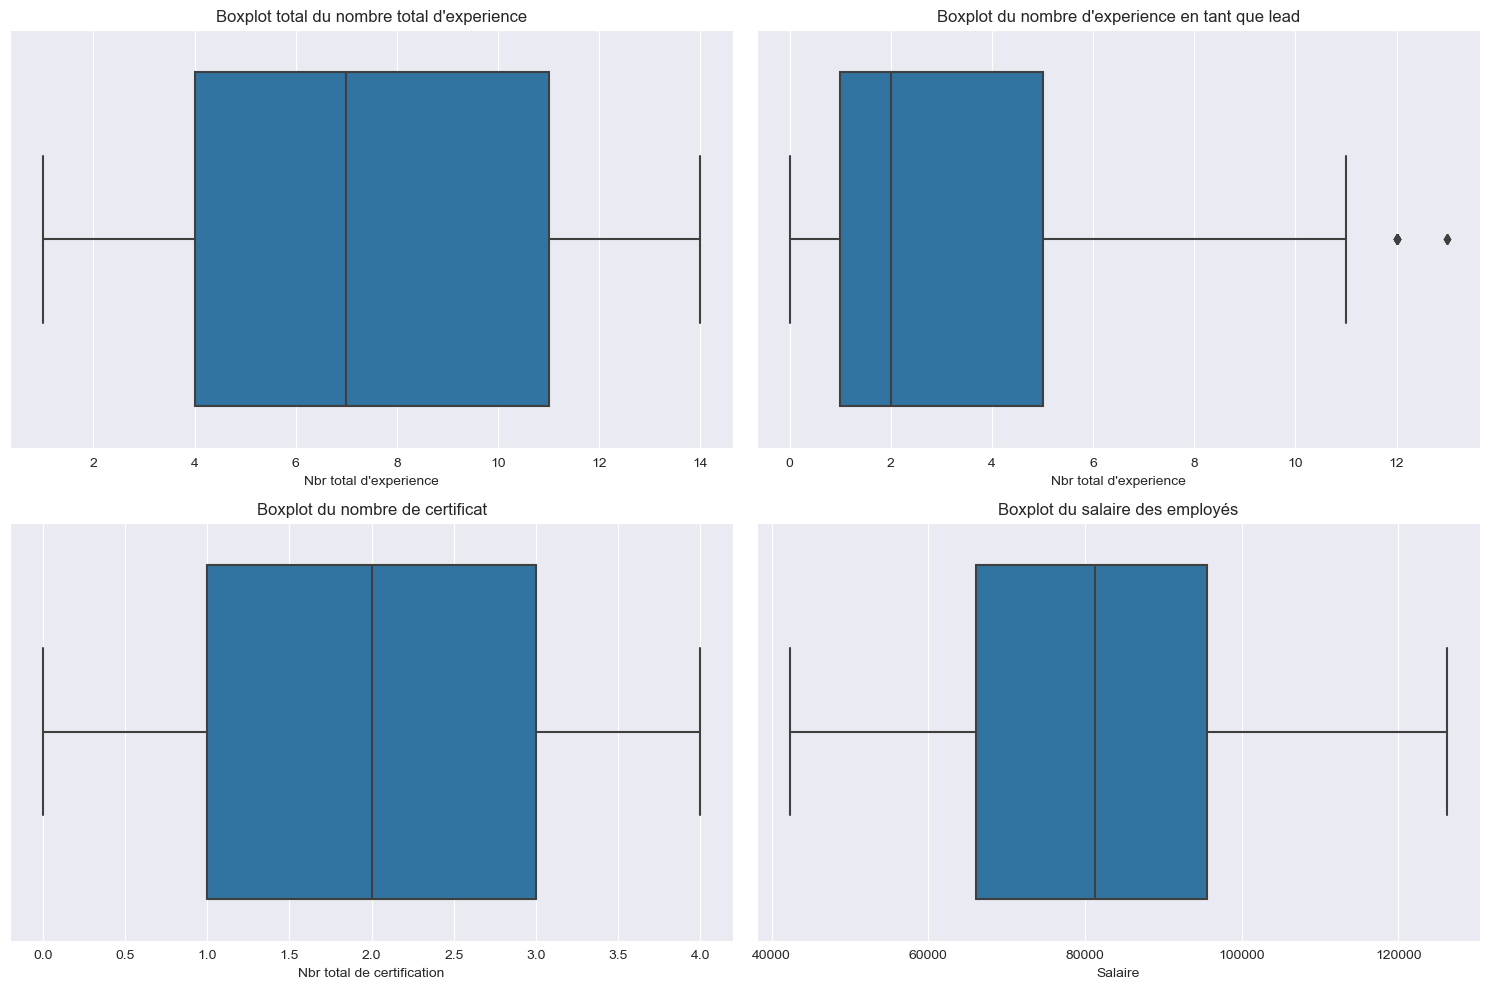

In [1666]:
# Création de la figure et des sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot pour le prix des maisons (PRICE)
sn.boxplot(x=df['Nbr_T_Exp'], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot total du nombre total d'experience")
axes[0, 0].set_xlabel("Nbr total d'experience")

# Boxplot pour le nombre de chambres (BEDS)
sn.boxplot(x=df['Nbr_Lead_Exp'], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot du nombre d'experience en tant que lead")
axes[0, 1].set_xlabel("Nbr total d'experience")

# Boxplot pour le nombre de salles de bain (BATH)
sn.boxplot(x=df['Nbr_Certif'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot du nombre de certificat')
axes[1, 0].set_xlabel("Nbr total de certification")

# Boxplot pour les prix des maisons (PROPERTYSQFT)
sn.boxplot(x=df['Salary'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot du salaire des employés')
axes[1, 1].set_xlabel("Salaire")

# Affichage des graphiques
plt.tight_layout()
plt.show()

In [1667]:
df.describe()

,Nbr_T_Exp,Nbr_Lead_Exp,Nbr_PM_Exp,Nbr_Certif,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.443000,3.197000,1.629000,2.049000,81405.671673
std,4.113596,3.119282,2.148482,1.423596,18256.125772
min,1.000000,0.000000,0.000000,0.000000,42298.056827
25%,4.000000,1.000000,0.000000,1.000000,66045.779366
50%,7.000000,2.000000,1.000000,2.000000,81241.246184
75%,11.000000,5.000000,3.000000,3.000000,95624.152980
max,14.000000,13.000000,13.000000,4.000000,126221.716735


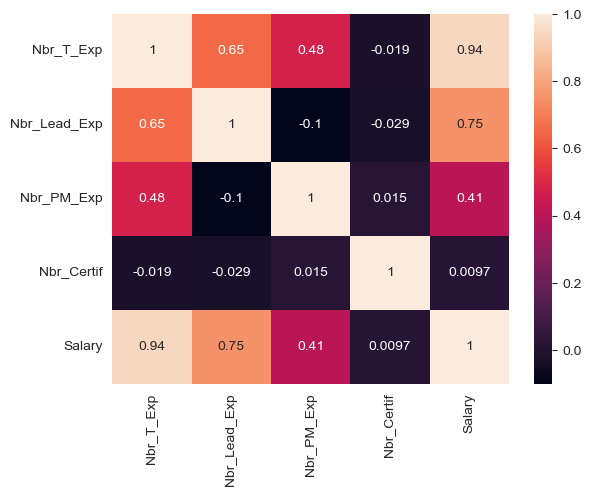

In [1668]:
matrix_corr=df.corr()
#Visualisation la matrix de correlation
sn.heatmap(matrix_corr, annot=True)
plt.show()

In [1669]:
# Division des données en ensembles d'entraînement
Y = df['Salary']
X = df.drop('Salary', axis=1)

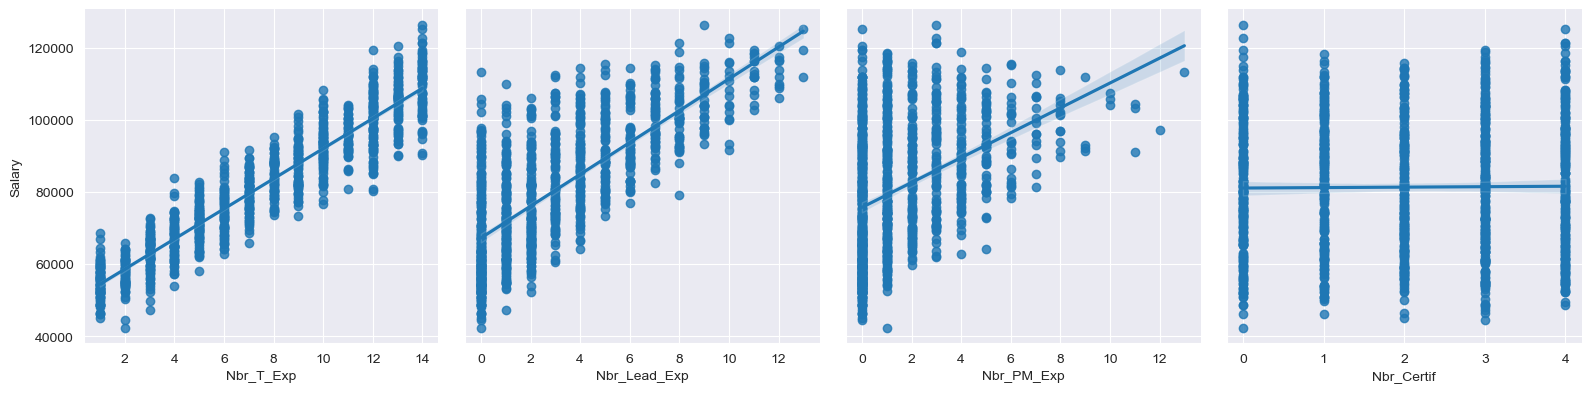

In [1670]:

grid = sn.PairGrid(df, x_vars=X.columns, y_vars=Y.name, height=4)
grid = grid.map(sn.regplot)
plt.show()    

In [1671]:
X.drop(['Nbr_Certif'], axis=1,inplace=True)
X

,Nbr_T_Exp,Nbr_Lead_Exp,Nbr_PM_Exp
0,7,2,4
1,4,0,2
2,13,4,8
3,11,3,2
4,8,1,6
...,...,...,...
995,8,1,6
996,12,3,1
997,14,10,1
998,7,5,0


#Verification PCA

In [1672]:
# Standardiser les données
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [1673]:
# components pour le nombre d'axe d'analyse (composant principal)
model_pca = PCA(n_components=3)
axesprincipales = model_pca.fit_transform(scaled_X)
axesprincipales

array([[ 0.12127801,  1.1143365 , -0.34877767],
       [-1.12980456,  0.70860875, -0.06327833],
       [ 2.25650939,  2.30191932, -0.55180572],
       ...,
       [ 2.29644689, -1.4546553 , -0.02714128],
       [-0.0355805 , -0.95706023, -0.06538445],
       [ 1.03203519, -0.36326882, -0.16689848]])

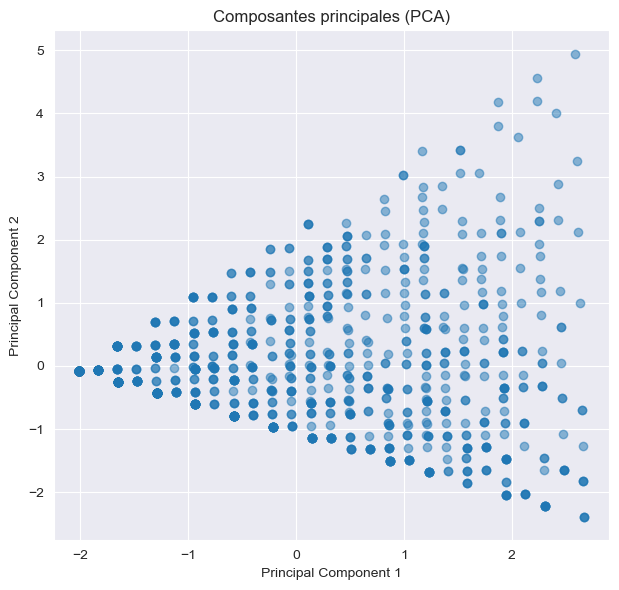

In [1674]:
# Afficher les données bruitées et les composantes principales
plt.figure(figsize=(12, 6))

# Composantes principales (PCA)
plt.subplot(1, 2, 2)
plt.scatter(axesprincipales[:, 0], axesprincipales[:, 1], alpha=0.5)
plt.title('Composantes principales (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


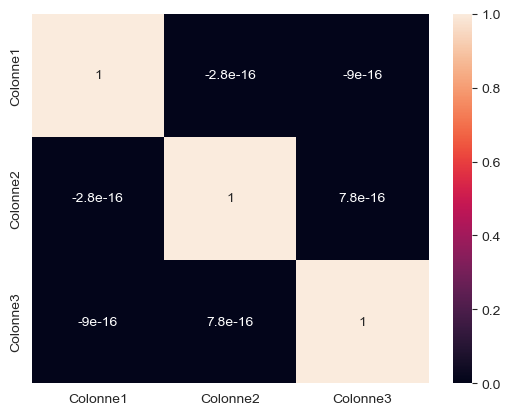

In [1675]:

matrix_corr= pd.DataFrame(axesprincipales, columns=['Colonne1', 'Colonne2','Colonne3']).corr()
#Visualisation la matrix de correlation
sn.heatmap(matrix_corr, annot=True)
plt.show()

In [1676]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(axesprincipales, Y, test_size=0.2, random_state=1)

In [1677]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
# Définition des stratégies de baseline
strategies = ["constant", "quantile", "mean", "median"]
baseline_args = [{"strategy": s} for s in strategies]
baseline_args[0]['constant'] = 50  # Exemple de valeur constante
baseline_args[1]['quantile'] = 0.75  # Utilisation du 75e quantile

# Définition de la fonction regression_metrics
def regression_metrics(y_pred, y_test):
    #Calcul de l'erreur
    e=y_pred-y_test
    
    # calcule de l'erreur quadratique
    se = (e) ** 2
    # Calcul du Mean Absolute Error (MAE)
    mae = np.mean(np.abs(e))

    # Calcul du Mean Squared Error (MSE)
    mse = np.mean(se)

    # Calcul du Median Absolute Error (MeAE)
    meae = np.median(np.abs(e))

    # Calcul du Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calcul du coefficient de détermination (R^2)
    ss_res = np.sum(se)
    ss_tot = np.sum((np.mean(y_test)-y_test) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Affichage des résultats
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Median Absolute Error (MeAE): {meae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Coefficient of Determination (R^2): {r_squared}")

# Fonction pour créer et évaluer les DummyRegressors
def dummy_regressors(**args):
    baseline = DummyRegressor(**args)
    baseline.fit(X_train, y_train)
    y_pred = baseline.predict(X_test)
    print(f"strategie: {args['strategy']}")
    regression_metrics(y_pred,y_test)

# Appliquer les stratégies de DummyRegressor
[dummy_regressors(**strat) for strat in baseline_args]

strategie: constant
Mean Absolute Error (MAE): 81967.6569400707
Mean Squared Error (MSE): 7036851277.053917
Median Absolute Error (MeAE): 80507.19428822913
Root Mean Squared Error (RMSE): 83885.94207049186
Coefficient of Determination (R^2): -21.117717763247025
strategie: quantile
Mean Absolute Error (MAE): 18935.951942070675
Mean Squared Error (MSE): 504536429.2796031
Median Absolute Error (MeAE): 16733.555514754764
Root Mean Squared Error (RMSE): 22461.8883729664
Coefficient of Determination (R^2): -0.5858221105895918
strategie: mean
Mean Absolute Error (MAE): 15002.134755762461
Mean Squared Error (MSE): 318739689.63260037
Median Absolute Error (MeAE): 13624.899827504196
Root Mean Squared Error (RMSE): 17853.282320979535
Coefficient of Determination (R^2): -0.0018393479804101887
strategie: median
Mean Absolute Error (MAE): 15011.820210824635
Mean Squared Error (MSE): 318439579.6803531
Median Absolute Error (MeAE): 13755.087298208928
Root Mean Squared Error (RMSE): 17844.875445918726


[None, None, None, None]

In [1678]:

def residual_plot(y_true, y_predicted, model_name):
    plt.figure(figsize=(10, 6))
    # Calcul des résidus
    residuals = y_true - y_predicted

    # Création du graphique des résidus
    plt.figure(figsize=(8, 6))
    plt.scatter(y_predicted, residuals, alpha=1, label="Résidus")
    plt.axhline(y=0, color='r', linestyle='--', label="Zéro")
    plt.title(f"Graphique des Résidus de {model_name}")
    plt.xlabel("Valeur Prédite")
    plt.ylabel("Résidu")
    plt.legend()
    plt.show()

In [1679]:
#question 4
# Standardisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def regression_metrics(y_test, y_pred, model_name='Regression Model'):
    # calcule de l'erreur quadratique
    se = (y_test - y_pred) ** 2
    
    # Calcul du Mean Absolute Error (MAE)
    mae = np.mean(np.abs(y_test - y_pred))

    # Calcul du Mean Squared Error (MSE)
    mse = np.mean(se)

    # Calcul du Median Absolute Error (MeAE)
    meae = np.median(np.abs(y_test - y_pred))
    
    # Calcul du Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calcul du coefficient de détermination (R^2)
    ss_res = np.sum(se)
    ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    print(f"{model_name}:")
    # Affichage des résultats
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Median Absolute Error (MeAE): {meae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Coefficient of Determination (R^2): {r_squared}")         
                     


In [1681]:

# Régression Linéaire Multiple
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
regression_metrics(y_test, y_pred_lr, 'Linear Regression')

# Régression Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
regression_metrics(y_test, y_pred_ridge, 'Ridge Regression')

# Régression Lasso 
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
regression_metrics(y_test, y_pred_lasso, 'Lasso Regression')


Mean Absolute Error (MAE): 3908.82446028488
Mean Squared Error (MSE): 24334638.961608108
Median Absolute Error (MeAE): 3083.908356723172
Root Mean Squared Error (RMSE): 4933.015199815231
Coefficient of Determination (R^2): 0.923513137448501
Linear Regression:
Mean Absolute Error (MAE): 3910.346991082582
Mean Squared Error (MSE): 24341468.547903568
Median Absolute Error (MeAE): 3091.310226581416
Root Mean Squared Error (RMSE): 4933.707383692669
Coefficient of Determination (R^2): 0.9234916711909128
Ridge Regression:
Mean Absolute Error (MAE): 3909.16346788195
Mean Squared Error (MSE): 24336480.626714703
Median Absolute Error (MeAE): 3081.8696818585086
Root Mean Squared Error (RMSE): 4933.201863568397
Coefficient of Determination (R^2): 0.9235073488610437
Lasso Regression:


<Figure size 1000x600 with 0 Axes>

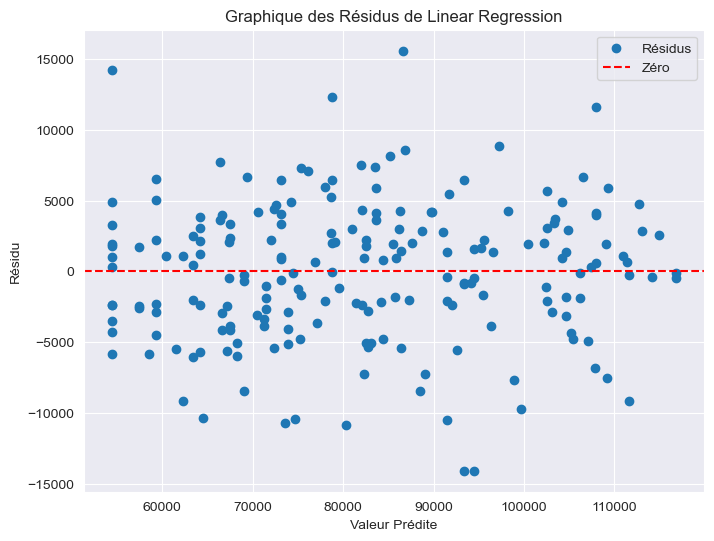

In [1682]:
residual_plot(y_test,y_pred_lr,'Linear Regression')